In [177]:
import pandas as pd
import sklearn as sk
from sklearn import preprocessing,decomposition
import matplotlib.pyplot as plt

Question 1 - Data Transformation 

A module coordinator has just completed the module assessments, and s/he would like to perform a quick analysis on the students results in various components of the module. The main objective is to see if there is any correlation between the assessment components. The students’ results are given in the file “Students_Results.csv”. Using Python script, answer the following questions:


1. Find the minimum, maximum, mean and standard deviation for each Homework column and the exam column.
2. Add an additional named as ‘Homework Avg’ for the average homework mark for each student. Assume that the weighting of the homework average is 25% and that of the examination is 75%, add an additional column named 'Overall Mark' for the overall folded mark.
3. Construct a correlation matrix of homework and exam variables. What can you conclude from the matrix?
4. Discuss various ways of treating the missing values in the dataset.
5. Use UCD grading system to convert the final mark into a grade (column named ‘Grade’).
Produce a histogram for the grades.
6. Save the newly generated dataset to “./output/question1_out.csv”.

In [71]:
def cleanse_missing_grades(df):
    """A function to replace the missing grades for HW and Exam with 0"""

    for hwno in range(1,4):
        df['Homework {}'.format(hwno)]=df['Homework {}'.format(hwno)].fillna(0)
    
    df['Exam']=df['Exam'].fillna(0)
    
    

In [82]:
def question_one():
    student_df=pd.read_csv('./specs/Students_Results.csv')
    
    #Part 1
    student_df=question_one_part_one(df=student_df)
    
    #Part 2
    student_df=question_one_part_two(df=student_df)
    
    question_one_part_three(df=student_df)
    
    question_one_part_four()
    
    student_df=question_one_part_five(df=student_df)
    
    question_one_part_six(df=student_df)
    
    return student_df

In [83]:
def question_one_part_one(df):
    """A function to complete Q1P1"""
    
    print("""
-
QUESTION 1 - P1
-
    
    
""")
    
    def df_describe(df):
        """The dataframe before cleansing"""
        
        answer_df=df.describe().T

        print("The df shape is {}".format(df.shape))
        mean_col_name='mean'
        min_col_name='min'
        max_col_name='max'
        std_col_name='std'
        count_col_name='count'



        for homework_no in range(1,4):
            homework_column="Homework {}".format(homework_no)
            answer_statement="""
    Homework: {}
    Minimum: {}
    Maximum: {}
    Mean: {}
    Std. Deviation: {}
    Count: {}
    """
            filter_df=answer_df[answer_df.index==homework_column]

            min_col=filter_df[min_col_name][0]
            max_col=filter_df[max_col_name][0]
            mean_col=filter_df[mean_col_name][0]
            std_col=filter_df[std_col_name][0]
            cnt_col=filter_df[count_col_name][0]

            print(answer_statement.format(homework_column,
                                          min_col,
                                          max_col,
                                          mean_col,
                                          std_col,
                                         cnt_col))

        return
    
    df=pd.read_csv("./specs/Students_Results.csv")
    
    print("""
---
Before Cleansing
---

""")
    
    df_describe(df=df)
    
    cleanse_missing_grades(df=df)
    
    print("""
---
After Cleansing
---

""")
    
    
    df_describe(df=df)

    return df

In [84]:
def question_one_part_two(df):
    
    print("""
-
QUESTION 1 - P2
-
    
    
""")
    
    df['Homework Avg']=(
                            (  (df['Homework 1'] + 
                                df['Homework 2'] +
                                df['Homework 3'])/3
                            )
                       )
    
    df['Overall Mark']=0.25*df['Homework Avg'] + 0.75*df['Exam']
    
    return df

In [85]:
def question_one_part_three(df):
    """Create a correlation matrix"""
    
    print("""
-
QUESTION 1 - P3
-
""")
    
    print("Correlation matrix: ")
    
    non_stud_col=[]
    
    for col in df.columns:
        
        if col!='Student ID':
            non_stud_col+=[col]
    
    corr_df=df[non_stud_col].corr()
    
    print(corr_df)

In [86]:
def question_one_part_four():
    """See assignment"""
    return

In [87]:
def question_one_part_five(df):
    """Question 1 Part 5"""
    
    def ucd_grading(row):
        """UCD Computer Science Grading"""
        
        Ap=95
        A=90
        Am=85
        Bp=80
        B=75
        Bm=70
        Cp=65
        C=60
        Cm=55
        Dp=50
        D=45
        Dm=40
        Ep=35
        E=30
        Em=25
        Fp=20
        F=15
        Fm=10
        Gp=8
        G=5
        Gm=2
        NG=0
        
        if row['Overall Mark']>=Ap and row['Overall Mark']<=100:
              return 'A+'
            
        if row['Overall Mark']>=A and row['Overall Mark']<Ap:
              return 'A'
            
        if row['Overall Mark']>=Am and row['Overall Mark']<A:
              return 'A-'
            
            
            
        if row['Overall Mark']>=Bp and row['Overall Mark']<Am:
              return 'B+'
            
        if row['Overall Mark']>=B and row['Overall Mark']<Bp:
              return 'B'
            
        if row['Overall Mark']>=Bm and row['Overall Mark']<B:
              return 'B-'
            
            
        if row['Overall Mark']>=Cp and row['Overall Mark']<Bm:
              return 'C+'
            
        if row['Overall Mark']>=C and row['Overall Mark']<Cp:
              return 'C'
            
        if row['Overall Mark']>=Cm and row['Overall Mark']<C:
              return 'C-'
            
            
            
        if row['Overall Mark']>=Dp and row['Overall Mark']<Cm:
              return 'D+'
            
        if row['Overall Mark']>=D and row['Overall Mark']<Dp:
              return 'D'
            
        if row['Overall Mark']>=Dm and row['Overall Mark']<D:
              return 'D-'
            
            
            
        if row['Overall Mark']>=Ep and row['Overall Mark']<Dm:
              return 'E+'
            
        if row['Overall Mark']>=E and row['Overall Mark']<Ep:
              return 'E'
            
        if row['Overall Mark']>=Em and row['Overall Mark']<E:
              return 'E-'
            

            
        if row['Overall Mark']>=Fp and row['Overall Mark']<Em:
              return 'F+'
            
        if row['Overall Mark']>=F and row['Overall Mark']<Fp:
              return 'F'
            
        if row['Overall Mark']>=Fm and row['Overall Mark']<F:
              return 'F-'
            
            
        if row['Overall Mark']>=Gp and row['Overall Mark']<Bm:
              return 'G+'
            
        if row['Overall Mark']>=G and row['Overall Mark']<Gp:
              return 'G'
            
        if row['Overall Mark']>=Gm and row['Overall Mark']<G:
              return 'G-'
            
        if row['Overall Mark']>=NG and row['Overall Mark']<Gm:
              return 'NG'
            
        return 'Grade Error'
        
    df['Grade']= df.apply(lambda row: ucd_grading(row), axis=1)
    
    ax=(df['Overall Mark']
            .plot(
                kind='hist'
                ,title='Histogram of Overall Marks'
                ,xlabel='Overall Mark'
                ,ylabel='No of Students'
                ,bins=10
                )
            .set_xlim((0,100))
        )
    
    
    
    plt.savefig('./output/histogram_of_grades_q1.png')
    
    
    
    df_grade=df['Grade'].value_counts().reindex(index = ['A+','A','A-',
                                                         'B+','B','B-',
                                                         'C+','C','C-',
                                                         'D+','D','D-',
                                                        'E+','E','E-',
                                                        'F+','F','F-',
                                                        'G+','G','G-'])
    
    new_ax=(df_grade
            .plot(
                kind='bar'
                ,title='Barchart of Grades'
                ,xlabel='Grade'
                ,ylabel='No of Students'
                )
        )
    
    plt.savefig('./output/barchart_of_grades_q1.png')
    
    
    return df

In [172]:
def question_one_part_six(df):
    df.to_csv('./output/question1_out.csv',index=False)


-
QUESTION 1 - P1
-
    
    


---
Before Cleansing
---


The df shape is (54, 5)

    Homework: Homework 1
    Minimum: 31.0
    Maximum: 90.0
    Mean: 55.64150943396226
    Std. Deviation: 17.877891739867128
    Count: 53.0
    

    Homework: Homework 2
    Minimum: 0.0
    Maximum: 98.0
    Mean: 89.83333333333333
    Std. Deviation: 15.441612487898249
    Count: 54.0
    

    Homework: Homework 3
    Minimum: 5.0
    Maximum: 100.0
    Mean: 47.6875
    Std. Deviation: 21.585215832907288
    Count: 48.0
    

---
After Cleansing
---


The df shape is (54, 5)

    Homework: Homework 1
    Minimum: 0.0
    Maximum: 90.0
    Mean: 54.611111111111114
    Std. Deviation: 19.259319397315124
    Count: 54.0
    

    Homework: Homework 2
    Minimum: 0.0
    Maximum: 98.0
    Mean: 89.83333333333333
    Std. Deviation: 15.441612487898249
    Count: 54.0
    

    Homework: Homework 3
    Minimum: 0.0
    Maximum: 100.0
    Mean: 42.388888888888886
    Std. Deviation: 25.3380291907330

,Student ID,Homework 1,Homework 2,Homework 3,Exam,Homework Avg,Overall Mark,Grade
0,1,0.0,94,34.0,42.0,42.666667,42.166667,D-
1,2,35.0,94,85.0,45.0,71.333333,51.583333,D+
2,3,31.0,46,22.0,48.0,33.000000,44.250000,D-
3,4,46.0,90,60.0,50.0,65.333333,53.833333,D+
4,5,52.0,94,49.0,50.0,65.000000,53.750000,D+
5,6,58.0,94,30.0,51.0,60.666667,53.416667,D+
6,7,47.0,90,0.0,52.0,45.666667,50.416667,D+
7,8,37.0,94,25.0,52.0,52.000000,52.000000,D+
8,9,35.0,94,45.0,54.0,58.000000,55.000000,C-
9,10,57.0,94,100.0,54.0,83.666667,61.416667,C


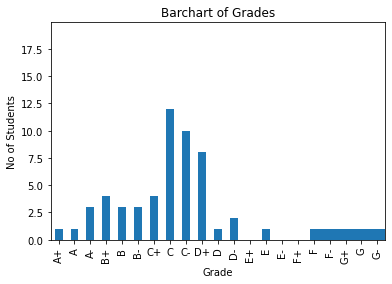

In [173]:
question_one()

In [174]:
def question_two():
    sensor_df=pd.read_csv('./specs/Sensor_Data.csv')
    sensor_df=question_two_part_one(sensor_df)
    sensor_df=question_two_part_two(sensor_df)
    sensor_df=question_two_part_three(sensor_df)
    sensor_df=question_two_part_four(sensor_df)
    question_two_part_five(sensor_df)
    return

In [175]:
def question_two_part_one(df):
    df['Original Input3']=df['Input3']
    df['Original Input12']=df['Input12']
    return df

def question_two_part_two(df):
    """Scale the columns"""
    
    #Z score
    df['Input3']=(df['Input3'] - df['Input3'].mean())/df['Input3'].std()

    return df
    
    

def question_two_part_three(df):
    """Scale the columns"""    

    #MinMax
    if df['Input12'].max()-df['Input12'].min()>0:
        df['Input12']=(df['Input12']-df['Input12'].min())/(df['Input12'].max()-df['Input12'].min())
    else:
        print("Error: Min=Max")
    
    return df

def question_two_part_four(df):
    
    inputs=[]
    for input_no in range(1,13):
        inputs+=['Input{}'.format(input_no)]
    
    df['Average Input']=df[inputs].mean(axis=1)
    
    return df

def question_two_part_five(df):
    
    df.to_csv('./output/question2_out.csv',index=False)
    
    return

In [176]:
question_two()

In [227]:
df=pd.read_csv('./specs/DNA_Data.csv')

#pca_data = preprocessing.scale(df)

def question_three_part_one(df):

    def pca_given_limit(df,cut_off_limit=0.95):
        """PCA to get components given a cutoff"""

        component_no=1
        explained_variance = {}
        explained_variance['default'] = -1

        #Add in components
        while max(explained_variance.values())<cut_off_limit and component_no<len(df.columns):
            pca = decomposition.PCA(n_components = component_no)
            pca.fit(df)
            post_pca_data = pca.transform(df)

            for component in range(0, len(pca.explained_variance_ratio_)):

                current_feature='PCA_{}'.format(component)

                if component == 0:
                    explained_variance[current_feature]=pca.explained_variance_ratio_[component]

                else:
                    previous_explained_variance=explained_variance['PCA_{}'.format(component-1)]
                    explained_variance[current_feature] = pca.explained_variance_ratio_[component] + previous_explained_variance

            component_no+=1



        return post_pca_data, explained_variance
    
    pca_data, var_dict = pca_given_limit(df,cut_off_limit=0.95)
    
    pca_col_names=[]
    
    for k in range(0,pca_data.shape[1]):
        pca_col_names+=['pca{}'.format(k+1)]
        
    pca_df=pd.DataFrame(pca_data)
    pca_df.columns=pca_col_names
        
    return pca_df, var_dict


In [233]:
df=pd.read_csv('./specs/DNA_Data.csv')

#pca_data = preprocessing.scale(df)

def question_three_part_one(df):

    def pca_given_limit(df,cut_off_limit=0.95):
        """PCA to get components given a cutoff"""

        component_no=1
        explained_variance = {}
        explained_variance['default'] = -1

        #Add in components
        while max(explained_variance.values())<cut_off_limit and component_no<len(df.columns):
            pca = decomposition.PCA(n_components = component_no)
            pca.fit(df)
            post_pca_data = pca.transform(df)

            for component in range(0, len(pca.explained_variance_ratio_)):

                current_feature='PCA_{}'.format(component)

                if component == 0:
                    explained_variance[current_feature]=pca.explained_variance_ratio_[component]

                else:
                    previous_explained_variance=explained_variance['PCA_{}'.format(component-1)]
                    explained_variance[current_feature] = pca.explained_variance_ratio_[component] + previous_explained_variance

            component_no+=1



        return post_pca_data, explained_variance
    
    pca_data, var_dict = pca_given_limit(df,cut_off_limit=0.95)
    
    pca_col_names=[]
    
    for k in range(0,pca_data.shape[1]):
        pca_col_names+=['pca{}'.format(k)]
        
    pca_df=pd.DataFrame(pca_data)
    pca_df.columns=pca_col_names
        
    return pca_df, var_dict



def question_three_part_two(original_df,pca_df):
    """Test"""
    
    pca_columns=pca_df.columns
    
    for column in pca_columns:
        original_df["{}_width".format(column)]=pd.cut(pca_df[column],10)
        
    return original_df

def question_three_part_three(original_df,pca_df):
    """Test"""
    
    pca_columns=pca_df.columns
    
    for column in pca_columns:
        original_df["{}_freq".format(column)]=pd.qcut(pca_df[column],10)
        
    return original_df

def question_three_part_four(df):
    """Test"""
    
    df.to_csv('./output/question3_out.csv',index=False)
        
    return

def question_three():
    """Question Three"""
    df=pd.read_csv('./specs/DNA_Data.csv')
    pca_df, var_dict=question_three_part_one(df)
    question_three_part_two(original_df=df,pca_df=pca_df)
    question_three_part_three(original_df=df,pca_df=pca_df)
    question_three_part_four(df=df)
    return
    

In [234]:
question_three()

In [229]:
pca_df

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22
0,-6.002624,4.672008,1.957606,-1.073151,-0.183895,-0.243254,-0.626981,0.356876,0.509630,0.213930,...,-0.502858,-0.133410,0.333127,-0.297525,-0.263685,0.002790,-0.878948,0.228988,-0.458388,0.945338
1,-6.048979,5.985697,-0.297422,-1.211313,0.025128,0.530072,0.731626,-0.321467,0.702519,0.341361,...,0.545944,-0.216404,1.788548,0.658063,1.304197,-0.955880,1.097331,0.048741,-0.724134,-2.029831
2,-4.155725,5.984422,0.448010,-0.778514,-0.757741,1.471172,0.700716,-1.213908,0.313857,0.132518,...,1.579699,-0.562817,2.165262,-0.975355,0.684761,0.493367,-1.054047,-0.547504,-1.262067,0.683455
3,-2.421035,3.462433,2.519800,-1.316631,-4.345582,2.376696,-2.647289,1.793901,-1.106239,-1.137910,...,-1.613370,-0.286636,0.737425,0.410424,0.929558,-0.356366,-0.218367,-1.066262,-0.075347,0.311253
4,-5.328851,4.103477,1.921709,0.935512,0.976898,-0.441423,-0.877892,-0.135357,-0.710205,-0.999495,...,-2.679220,-0.309800,0.122171,-0.607805,-0.580030,-0.622568,2.321351,0.625115,0.380354,1.065625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,-1.836277,-4.746428,-5.175667,9.770035,-1.695790,0.977442,-3.992877,1.043071,-0.150208,1.310598,...,-0.574839,-1.148475,1.110063,-0.113627,-1.269565,0.539080,-0.586569,-0.391401,-0.661822,-1.187117
84,-4.414860,-4.922591,-6.796487,8.273696,0.260865,2.166680,-2.609944,0.964602,0.267805,0.899020,...,0.712426,-0.151562,-0.477782,0.595181,0.038728,-0.444724,1.426611,0.214586,-0.035223,1.137703
85,-4.470997,-4.929048,-8.088914,10.496096,0.053982,2.519216,-3.632913,1.241690,1.074873,1.424615,...,-0.137106,0.138748,0.137144,-1.083935,1.561222,-0.346193,0.261182,0.196143,0.617307,1.054746
86,-4.381543,-10.723574,12.503098,6.885700,1.857809,-0.190746,-0.514388,1.952403,-2.867147,-2.684312,...,1.693151,1.232255,1.910242,-1.875529,-1.187863,-0.722785,1.133384,2.762881,-1.032190,0.256428


In [217]:
var_dict

{'default': -1,
 'PCA_0': 0.3608234292810376,
 'PCA_1': 0.5130847911956924,
 'PCA_2': 0.6150763649309374,
 'PCA_3': 0.6798224558988948,
 'PCA_4': 0.7265595828093258,
 'PCA_5': 0.7652861270302774,
 'PCA_6': 0.7975131776579792,
 'PCA_7': 0.8213909370490019,
 'PCA_8': 0.8384128846405281,
 'PCA_9': 0.8548674079967404,
 'PCA_10': 0.8686258790318748,
 'PCA_11': 0.881449204513006,
 'PCA_12': 0.8935780683530531,
 'PCA_13': 0.9036963666878098,
 'PCA_14': 0.9118169532043777,
 'PCA_15': 0.919302948930836,
 'PCA_16': 0.9261738670223237,
 'PCA_17': 0.9321853998414749,
 'PCA_18': 0.9379490069322554,
 'PCA_19': 0.9428427432477656,
 'PCA_20': 0.9476049742438346,
 'PCA_21': 0.9520255979277519}

In [203]:
component_data.shape

(88, 22)

In [204]:
component_data

array([[ -6.00262394,   4.67200801,   1.95760562, ...,   0.22898841,
         -0.45838766,   0.94533776],
       [ -6.04897924,   5.98569655,  -0.29742166, ...,   0.04874057,
         -0.72413377,  -2.02983075],
       [ -4.15572483,   5.98442225,   0.44800963, ...,  -0.54750374,
         -1.26206743,   0.6834554 ],
       ...,
       [ -4.47099746,  -4.92904808,  -8.08891388, ...,   0.19614346,
          0.61730738,   1.05474621],
       [ -4.38154281, -10.72357373,  12.50309835, ...,   2.76288054,
         -1.03218981,   0.25642785],
       [ -7.64691819,  10.82240457,  -0.11169878, ...,   0.86141595,
          1.69571046,   0.39598893]])